In [5]:
%matplotlib inline

In [61]:
import os
import numpy as np
import pickle as pk
from ipywidgets import interact
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
if 'cd' not in globals():
    cd = True
    os.chdir('..')

In [211]:
labels =  ['CR', 'PL', 'SP', 'PO', 'TU', 'GE', 'BG', 'TH', 'CH', 'FR', 'CZ', '203', '101', 'N', '404', '402', '307', '206', '107', '103']
langs = ['CR', 'PL', 'SP', 'PO', 'TU', 'GE', 'BG', 'TH', 'CH', 'FR', 'CZ', '203 (Lao)', '101 (Cantonese)', 'N (Dutch)', '404 (Georgian)', '402 (Javanese)', '307 (Amharic)', '206 (Zulu)', '107 (Vietnamese)', '103 (Bengali)']
families = [
    'South Slavic',
    'West Slavic',
    'Romance',
    'Romance',
    'Turkic',
    'Germanic',
    'South Slavic',
    'Tai',
    'Sinitic',
    'Romance',
    'West Slavic',
    'Tai',
    'Sinitic',
    'Germanic',
    'Kartvelian',
    'Austronesian',
    'Ethiopic',
    'Bantu',
    'Vietic',
    'Indo-Aryan'
]

In [212]:
label2lang = {ll: lang for ll, lang in zip(labels, langs)}

# LEMB embedding

In [9]:
emb_path = 'exp/train_pytorch_wav2vecfexlemb/results/language_emb.pk'
with open(emb_path, 'rb') as f:
    lembs, lang_labels = pk.load(f)
    
max_ep = 30
all_embs = []
for i in range(max_ep):
    ep = i + 1
    all_embs.append(lembs[ep])
all_embs = np.array(all_embs)

nep, nlang, embdim = all_embs.shape
print(nep, nlang, embdim)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
embs = tsne.fit_transform(all_embs.reshape(-1, embdim))

tsneembs = embs.reshape(nep, nlang, 2)

colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))
@interact
def update(i=(0,nep-1)):
    lemb = tsneembs[i]
    x_dist = max(lemb[:,0]) - min(lemb[:,0])
    y_dist = max(lemb[:,1]) - min(lemb[:,1])
    
    plt.figure(figsize=(20,15))
    plt.scatter(lemb[:,0], lemb[:,1], color=colors, s=10*y_dist, alpha=0.5)
    
    for le, ll, f in zip(lemb, lang_labels, families):
        plt.text(le[0], le[1]+0.001*x_dist, label2lang[ll].replace(' ', '\n'))
        plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)


30 20 128


interactive(children=(IntSlider(value=14, description='i', max=29), Output()), _dom_classes=('widget-interact'…

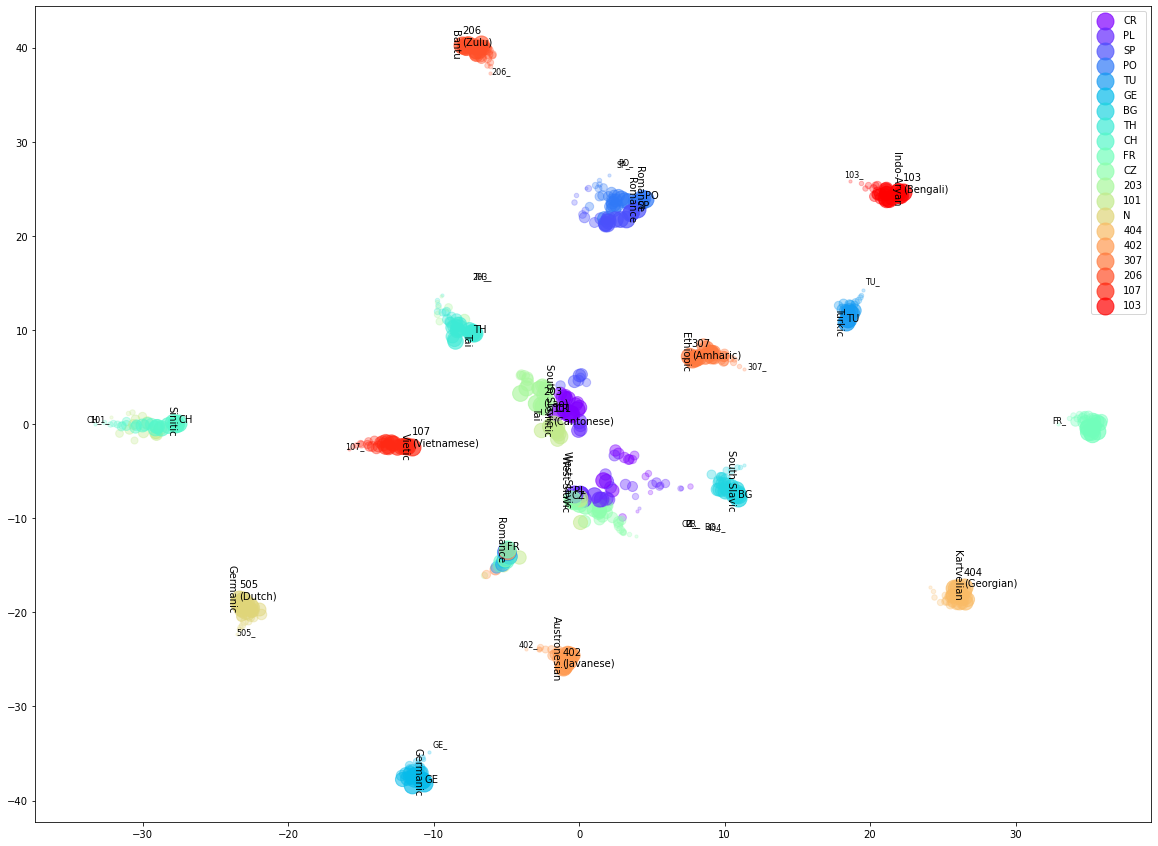

In [64]:
max_ep = 30
nep, nlang, embdim = tsneembs.shape
colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))

alphas = np.linspace(0.2,0.7,nep)
plt.figure(figsize=(20,15))
for ep, lemb_ep in enumerate(tsneembs):

    lemb_ep # (lang_label, embdim)
    for li, lemb in enumerate(lemb_ep):
        
        plt.scatter([
            lemb[0]], [lemb[1]], color=colors[li], alpha=alphas[ep], s=ep*10, 
            label=lang_labels[li] if ep+1 == max_ep else None
        )
        
    if ep == 0:
        x_dist = max(lemb_ep[:,0]) - min(lemb_ep[:,0])
        y_dist = max(lemb_ep[:,1]) - min(lemb_ep[:,1])
        for le, ll, f in zip(lemb_ep, lang_labels, families):
            plt.text(le[0], le[1]+0.005*x_dist, f"{label2lang[ll].split(' ')[0]}_", fontsize=0.12*x_dist)
#             plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)
        
x_dist = max(lemb_ep[:,0]) - min(lemb_ep[:,0])
y_dist = max(lemb_ep[:,1]) - min(lemb_ep[:,1])
for le, ll, f in zip(lemb_ep, lang_labels, families):
    plt.text(le[0], le[1]+0.001*x_dist, label2lang[ll].replace(' ', '\n'))
    plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)
plt.legend()
plt.show()

# LGCN

In [65]:
emb_path = 'exp/train_pytorch_wav2vecfexlgcn/results/language_emb.pk'
with open(emb_path, 'rb') as f:
    lembs, lang_labels = pk.load(f)
    
max_ep = 30
all_embs = []
for i in range(max_ep):
    ep = i + 1
    all_embs.append(lembs[ep])
all_embs = np.array(all_embs)

nep, nlang, embdim = all_embs.shape
nep, nlang, embdim

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
embs = tsne.fit_transform(all_embs.reshape(-1, embdim))

tsneembs = embs.reshape(nep, nlang, 2)

colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))
@interact
def update(i=(0,nep-1)):
    lemb = tsneembs[i]
    x_dist = max(lemb[:,0]) - min(lemb[:,0])
    y_dist = max(lemb[:,1]) - min(lemb[:,1])
    
    plt.figure(figsize=(20,15))
    plt.scatter(lemb[:,0], lemb[:,1], color=colors, s=10*y_dist, alpha=0.5)
    
    for le, ll, f in zip(lemb, lang_labels, families):
        plt.text(le[0], le[1]+0.001*x_dist, label2lang[ll].replace(' ', '\n'))
        plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)

interactive(children=(IntSlider(value=14, description='i', max=29), Output()), _dom_classes=('widget-interact'…

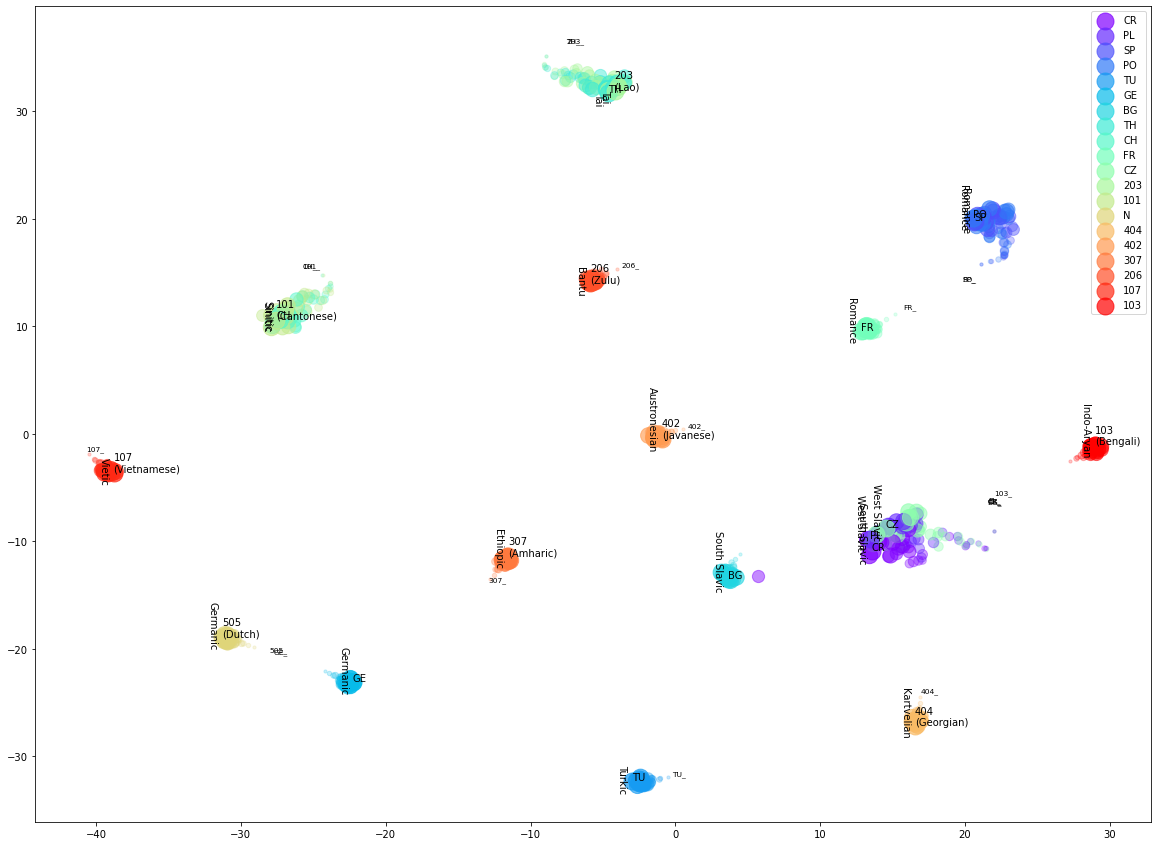

In [66]:
max_ep = 30
nep, nlang, embdim = tsneembs.shape
colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))

alphas = np.linspace(0.2,0.7,nep)
plt.figure(figsize=(20,15))
for ep, lemb_ep in enumerate(tsneembs):

    lemb_ep # (lang_label, embdim)
    for li, lemb in enumerate(lemb_ep):
        
        plt.scatter([
            lemb[0]], [lemb[1]], color=colors[li], alpha=alphas[ep], s=ep*10, 
            label=lang_labels[li] if ep+1 == max_ep else None
        )
        
    if ep == 0:
        x_dist = max(lemb_ep[:,0]) - min(lemb_ep[:,0])
        y_dist = max(lemb_ep[:,1]) - min(lemb_ep[:,1])
        for le, ll, f in zip(lemb_ep, lang_labels, families):
            plt.text(le[0], le[1]+0.001*x_dist, f"{label2lang[ll].split(' ')[0]}_", fontsize=0.12*x_dist)
#             plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)
        
x_dist = max(lemb_ep[:,0]) - min(lemb_ep[:,0])
y_dist = max(lemb_ep[:,1]) - min(lemb_ep[:,1])
for le, ll, f in zip(lemb_ep, lang_labels, families):
    plt.text(le[0], le[1]+0.001*x_dist, label2lang[ll].replace(' ', '\n'))
    plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)
plt.legend()
plt.show()

# Interspeech plots

In [ ]:
emb_path = 'exp/train_pytorch_wav2vecfexlemb/results/language_emb.pk'
with open(emb_path, 'rb') as f:
    lembs, lang_labels = pk.load(f)
    
max_ep = 30
all_embs = []
for i in range(max_ep):
    ep = i + 1
    all_embs.append(lembs[ep])
all_embs = np.array(all_embs)

nep, nlang, embdim = all_embs.shape
print(nep, nlang, embdim)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
embs = tsne.fit_transform(all_embs.reshape(-1, embdim))

tsneembs = embs.reshape(nep, nlang, 2)

colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))

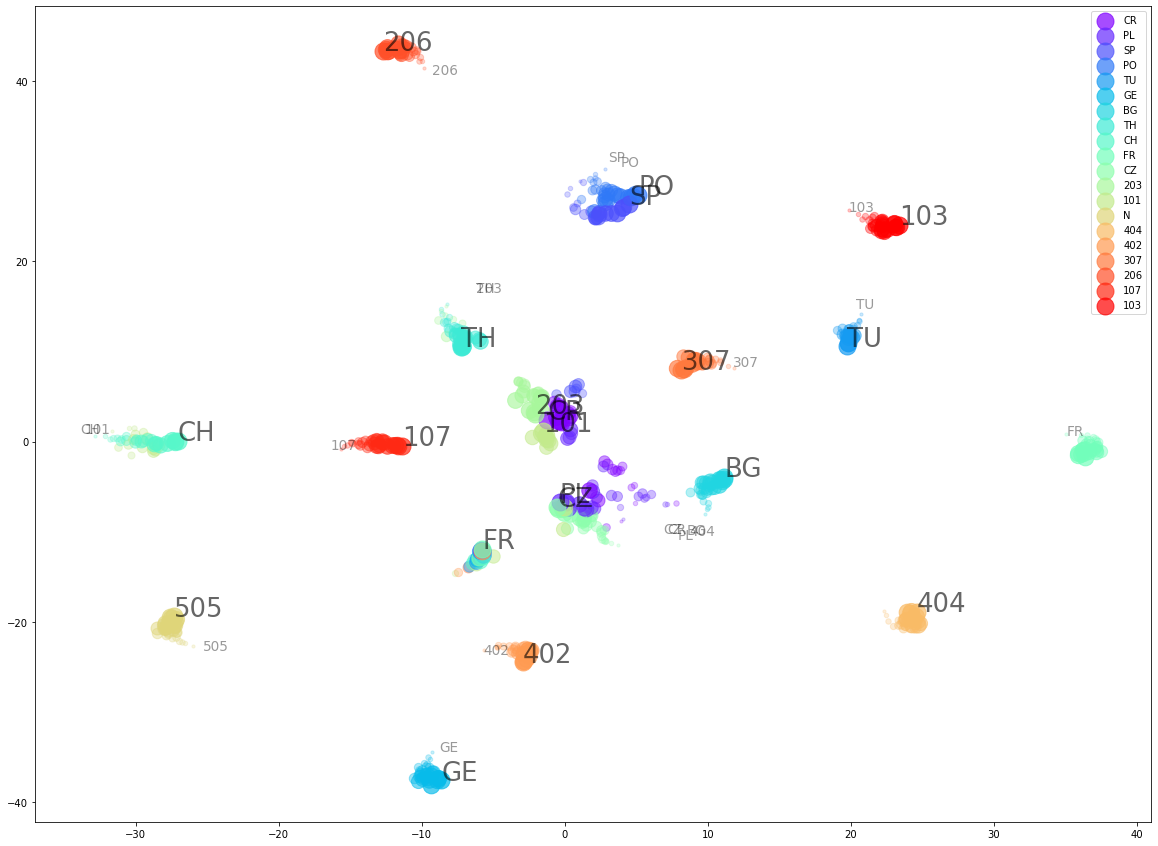

In [27]:
max_ep = 30
nep, nlang, embdim = tsneembs.shape
colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))

alphas = np.linspace(0.2,0.7,nep)
plt.figure(figsize=(20,15))
for ep, lemb_ep in enumerate(tsneembs):

    lemb_ep # (lang_label, embdim)
    for li, lemb in enumerate(lemb_ep):
        
        plt.scatter([
            lemb[0]], [lemb[1]], color=colors[li], alpha=alphas[ep], s=ep*10, 
            label=lang_labels[li] if ep+1 == max_ep else None
        )
        
    if ep == 0:
        x_dist = max(lemb_ep[:,0]) - min(lemb_ep[:,0])
        y_dist = max(lemb_ep[:,1]) - min(lemb_ep[:,1])
        for i, (le, ll, f) in enumerate(zip(lemb_ep, lang_labels, families)):
            plt.text(le[0]+0.005*y_dist*(-1)**(i-1), le[1]+0.005*x_dist*(-1)**(i), f"{label2lang[ll].split(' ')[0]}", fontsize=0.2*x_dist, alpha=0.4)
#             plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)
        
x_dist = max(lemb_ep[:,0]) - min(lemb_ep[:,0])
y_dist = max(lemb_ep[:,1]) - min(lemb_ep[:,1])
for le, ll, f in zip(lemb_ep, lang_labels, families):
    plt.text(le[0], le[1]+0.001*x_dist, label2lang[ll].split(' ')[0], fontsize=0.5*x_dist, alpha=0.6)
#     plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)
plt.legend()
plt.show()

In [29]:
emb_path = 'exp/train_pytorch_wav2vecfexlgcn/results/language_emb.pk'
with open(emb_path, 'rb') as f:
    lembs, lang_labels = pk.load(f)
    
max_ep = 30
all_embs = []
for i in range(max_ep):
    ep = i + 1
    all_embs.append(lembs[ep])
all_embs = np.array(all_embs)

nep, nlang, embdim = all_embs.shape
nep, nlang, embdim

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
embs = tsne.fit_transform(all_embs.reshape(-1, embdim))

tsneembs = embs.reshape(nep, nlang, 2)

colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))

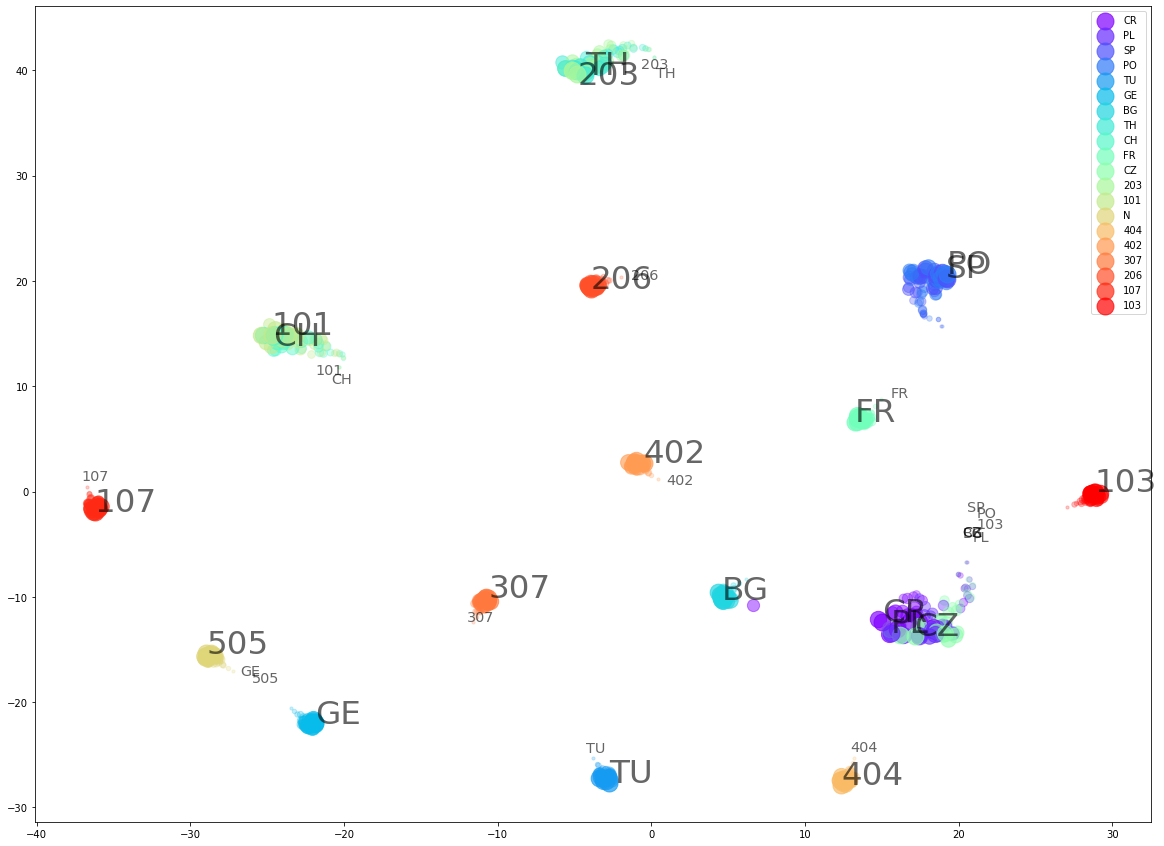

In [100]:
max_ep = 30
nep, nlang, embdim = tsneembs.shape
colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))

alphas = np.linspace(0.2,0.7,nep)
plt.figure(figsize=(20,15))
for ep, lemb_ep in enumerate(tsneembs):

    lemb_ep # (lang_label, embdim)
    for li, lemb in enumerate(lemb_ep):
        
        plt.scatter([
            lemb[0]], [lemb[1]], color=colors[li], alpha=alphas[ep], s=ep*10, 
            label=lang_labels[li] if ep+1 == max_ep else None
        )
        
    if ep == 0:
        x_dist = max(lemb_ep[:,0]) - min(lemb_ep[:,0])
        y_dist = max(lemb_ep[:,1]) - min(lemb_ep[:,1])
        for i, (le, ll, f) in enumerate(zip(lemb_ep, lang_labels, families)):
            if ll == '203' or ll == 'CH' or ll == 'GE':
                plt.text(le[0]-0.01*y_dist*(-1)**(i-1), le[1]-0.01*x_dist*(-1)**(i), f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
            else:
                plt.text(le[0]+0.005*y_dist*(-1)**(i-1), le[1]+0.005*x_dist*(-1)**(i), f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
#             plt.text(le[0]+0.005*y_dist*(-1)**(i-1), le[1]+0.005*x_dist*(-1)**(i), f"{label2lang[ll].split(' ')[0]}", fontsize=0.2*x_dist, alpha=0.4)
#             plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)
        
x_dist = max(lemb_ep[:,0]) - min(lemb_ep[:,0])
y_dist = max(lemb_ep[:,1]) - min(lemb_ep[:,1])
for le, ll, f in zip(lemb_ep, lang_labels, families):
    if ll == '203' or ll == 'CH':
        plt.text(le[0], le[1]-0.015*x_dist, label2lang[ll].split(' ')[0], fontsize=0.5*x_dist, alpha=0.6)
    else:
        plt.text(le[0], le[1]+0.001*x_dist, label2lang[ll].split(' ')[0], fontsize=0.5*x_dist, alpha=0.6)
#     plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)
plt.legend()
plt.show()

In [227]:
def plot1(emb_path, plt, title):
    with open(emb_path, 'rb') as f:
        lembs, lang_labels = pk.load(f)

    max_ep = 30
    all_embs = []
    for i in range(max_ep):
        ep = i + 1
        all_embs.append(lembs[ep])
    all_embs = np.array(all_embs)

    nep, nlang, embdim = all_embs.shape
    nep, nlang, embdim

    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    embs = tsne.fit_transform(all_embs.reshape(-1, embdim))

    tsneembs = embs.reshape(nep, nlang, 2)

    colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))
    
    max_ep = 30
    nep, nlang, embdim = tsneembs.shape
    colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))

    alphas = np.linspace(0.2,0.7,nep)
#     plt.figure(figsize=(20,15))
    for ep, lemb_ep in enumerate(tsneembs):

        lemb_ep # (lang_label, embdim)
        for li, lemb in enumerate(lemb_ep):

            plt.scatter([
                lemb[0]], [lemb[1]], color=colors[li], alpha=alphas[ep], s=ep*10, 
                label=lang_labels[li] if ep+1 == max_ep else None
            )

        if ep == 0:
            x_dist = max(lemb_ep[:,0]) - min(lemb_ep[:,0])
            y_dist = max(lemb_ep[:,1]) - min(lemb_ep[:,1])
            for i, (le, ll, f) in enumerate(zip(lemb_ep, lang_labels, families)):
                if ll == '203' or ll == 'CH' or ll == 'GE':
                    plt.text(le[0]+0.02*y_dist, le[1]+0.005*x_dist*(-1)**(i), f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
                elif ll == 'CZ' :
                    plt.text(le[0]+0.005*x_dist, le[1]+0.03*y_dist, f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
                elif ll == 'TH' :
                    plt.text(le[0]-0.01*x_dist, le[1]+0.01*y_dist, f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
                elif ll == 'CR' :
                    plt.text(le[0]-0.03*x_dist, le[1]+0.02*y_dist, f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
                elif ll == '404' :
                    plt.text(le[0]+0.03*x_dist, le[1]+0.02*y_dist, f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
                elif ll == 'PL' :
                    plt.text(le[0]+0.0*x_dist, le[1]-0.02*y_dist, f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
                else:
                    plt.text(le[0]+0.005*y_dist*(-1)**(i-1), le[1]+0.005*x_dist*(-1)**(i), f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
    #             plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)

    x_dist = max(lemb_ep[:,0]) - min(lemb_ep[:,0])
    y_dist = max(lemb_ep[:,1]) - min(lemb_ep[:,1])
    for le, ll, f in zip(lemb_ep, lang_labels, families):
        if ll == '203':
            plt.text(le[0], le[1]+0.03*y_dist, label2lang[ll].split(' ')[0], fontsize=0.5*x_dist, alpha=0.6)
        elif ll  ==  'PL':
            plt.text(le[0]-0.03*x_dist, le[1]+0.01*y_dist, label2lang[ll].split(' ')[0], fontsize=0.5*x_dist, alpha=0.6)
        
        else:
            plt.text(le[0], le[1]+0.001*x_dist, label2lang[ll].split(' ')[0], fontsize=0.5*x_dist, alpha=0.6)
    #     plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)
#     legend = plt.legend(loc='upper right',fontsize=11)
#     legend.get_frame().set_alpha(None)
#     legend.get_frame().set_facecolor((1, 1, 1, 0.5))
#     plt.title.set_text(title)


In [232]:
def plot2(emb_path, plt, title):
    with open(emb_path, 'rb') as f:
        lembs, lang_labels = pk.load(f)

    max_ep = 30
    all_embs = []
    for i in range(max_ep):
        ep = i + 1
        all_embs.append(lembs[ep])
    all_embs = np.array(all_embs)

    nep, nlang, embdim = all_embs.shape
    nep, nlang, embdim

    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    embs = tsne.fit_transform(all_embs.reshape(-1, embdim))

    tsneembs = embs.reshape(nep, nlang, 2)

    colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))
    
    max_ep = 30
    nep, nlang, embdim = tsneembs.shape
    colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))

    alphas = np.linspace(0.2,0.7,nep)
#     plt.figure(figsize=(20,15))
    for ep, lemb_ep in enumerate(tsneembs):

        lemb_ep # (lang_label, embdim)
        for li, lemb in enumerate(lemb_ep):

            plt.scatter([
                lemb[0]], [lemb[1]], color=colors[li], alpha=alphas[ep], s=ep*10, 
                label=lang_labels[li] if ep+1 == max_ep else None
            )

        if ep == 0:
            x_dist = max(lemb_ep[:,0]) - min(lemb_ep[:,0])
            y_dist = max(lemb_ep[:,1]) - min(lemb_ep[:,1])
            for i, (le, ll, f) in enumerate(zip(lemb_ep, lang_labels, families)):
                if ll == '203' or ll == 'CH' or ll == 'GE':
                    plt.text(le[0]-0.01*x_dist, le[1]-0.01*y_dist, f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
                elif ll == '103':
                    plt.text(le[0]+0.05*x_dist, le[1]+0.01*y_dist, f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
                elif ll == 'BG':
                    plt.text(le[0]+0.03*x_dist, le[1]-0.01*y_dist, f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
                elif ll == 'CR' or ll =='PO':
                    plt.text(le[0]-0.03*x_dist, le[1]+0.00*y_dist, f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
                elif ll == 'CZ':
                    plt.text(le[0]+0.005*x_dist, le[1]-0.01*y_dist, f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
                else:
                    plt.text(le[0]+0.005*x_dist, le[1]+0.005*y_dist, f"{label2lang[ll].split(' ')[0]}", fontsize=0.25*x_dist, alpha=0.6)
    #             plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)

    x_dist = max(lemb_ep[:,0]) - min(lemb_ep[:,0])
    y_dist = max(lemb_ep[:,1]) - min(lemb_ep[:,1])
    for le, ll, f in zip(lemb_ep, lang_labels, families):
        if ll == '203':
            plt.text(le[0]-0.03*x_dist, le[1]-0.03*x_dist, label2lang[ll].split(' ')[0], fontsize=0.5*x_dist, alpha=0.6)
        elif ll == '103':
            plt.text(le[0]-0.08*x_dist, le[1]+0.015*x_dist, label2lang[ll].split(' ')[0], fontsize=0.5*x_dist, alpha=0.6)
        elif ll  ==  'PL':
            plt.text(le[0]-0.08*x_dist, le[1]-0.015*y_dist, label2lang[ll].split(' ')[0], fontsize=0.5*x_dist, alpha=0.6)
        elif ll == 'CH' or  ll == 'PO':
            plt.text(le[0], le[1]-0.03*y_dist, label2lang[ll].split(' ')[0], fontsize=0.5*x_dist, alpha=0.6)
        else:
            plt.text(le[0], le[1]+0.001*x_dist, label2lang[ll].split(' ')[0], fontsize=0.5*x_dist, alpha=0.6)
    #     plt.text(le[0]-0.015*x_dist, le[1]-0.015*y_dist, f, rotation=270)
    legend = plt.legend(ncol=2, loc='upper right',fontsize=12)
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_facecolor((1, 1, 1, 0.5))
#     plt.title.set_text(title)


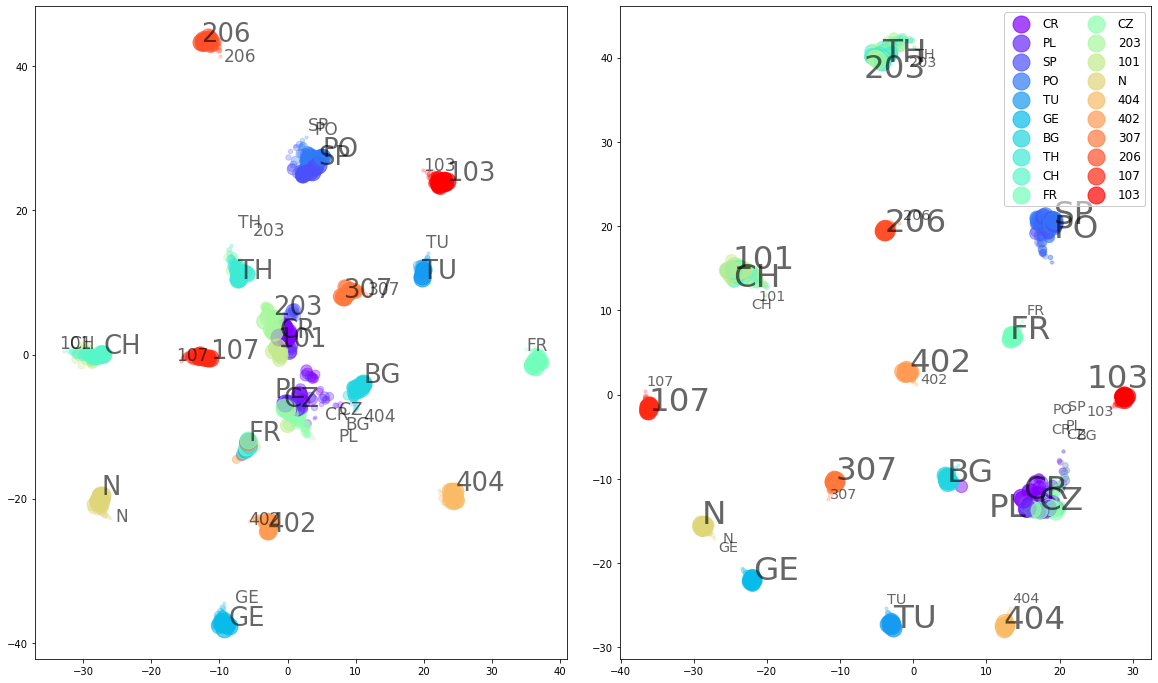

In [233]:
ax = plt.figure(figsize=(20,12))

ax1, ax2 = ax.subplots(1, 2)
emb_path = 'exp/train_pytorch_wav2vecfexlemb/results/language_emb.pk'
plot1(emb_path, ax1, title='embedding of w2v+linear')
emb_path = 'exp/train_pytorch_wav2vecfexlgcn/results/language_emb.pk'
plot2(emb_path, ax2, title='embedding of w2v+gcn')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax.savefig('plots/emb')

In [64]:
import json

In [71]:

def get_lang_emb(lang_emb_type):
    glotto_all_phonemes = 'phones/glotto_all_phonemes.json'
    lang2glottoph = 'phones/lang2glottoph_l20.json'
    lang2glotto = 'phones/lang2glotto_l20.json'

    with open(glotto_all_phonemes, 'r') as f:
        glotto_all_phonemes = sorted(json.load(f))
    with open(lang2glottoph, 'r') as f:
        lang2ph = json.load(f)
    with open(lang2glotto, 'r') as f:
        lang2glotto = json.load(f)


    all_langs = sorted([l for l in lang2ph.keys()])
    print(f'LangEmb All langs {all_langs}')

    # if lang_emb_type == 'all':
    #     print('Use all features')
    #     self.input_dim = args.lgcn_n2v_dim + len(self.glotto_all_phonemes)
    # elif lang_emb_type =='phoible':
    #     print('Use phoible features')
    #     self.input_dim = len(self.glotto_all_phonemes)
    # elif lang_emb_type =='glotto':
    #     print('Use glotto features')
    #     self.input_dim = args.lgcn_n2v_dim
    # else:
    #     raise ValueError(f'lang_emb_type {args.lang_emb_type} not implemented')

    # 1. g2v embedding
    lgcn_g2v_path = "langs/l20_lang2vec.zip"
    lgcn_graph_path = "langs/l20.gpk"

    if os.path.exists(f'{lgcn_g2v_path}.npy'):
        print('load g2v npy directly')
        g = nx.read_gpickle(lgcn_graph_path)
        node2idx = {l: i for i, l in enumerate(g.nodes)}

        n2v_embedding = np.load(f'{lgcn_g2v_path}.npy')
        lang_indices = [node2idx[lang2glotto[l]] for l in all_langs]
#         logging.warning(f'lang_indices  {lang_indices}')
        n2v_embedding = n2v_embedding[lang_indices]
#         logging.warning(f'n2v_embedding  {self.n2v_embedding.shape}')
    else: raise
#         self.g2v = Node2Vec.load(args.lgcn_g2v_path)
#         self.n2v_embedding = np.array([self.g2v.predict(l) for l in self.g.nodes])
#         self.g2v = Node2Vec.load(args.lgcn_g2v_path)
#         self.n2v_embedding = np.array([self.g2v.predict(self.lang2glotto[l]) for l in self.all_langs])

    # 2. one hot for phoneme used

    ph_embedding = np.zeros((len(lang2ph), len(glotto_all_phonemes)))
    for lang, phones in lang2ph.items():
        for ph in phones:
            ph_embedding[all_langs.index(lang), glotto_all_phonemes.index(ph)] = 1

    # 3. concate embeddings
    if lang_emb_type == 'all':
        embedding = np.concatenate([self.n2v_embedding, self.ph_embedding], axis=1)
    elif lang_emb_type == 'phoible':
        embedding = ph_embedding
    elif lang_emb_type == 'glotto':
        embedding = n2v_embedding

    return embedding

In [73]:
emb = get_lang_emb('phoible')

LangEmb All langs ['101', '103', '107', '203', '206', '307', '402', '404', 'BG', 'CH', 'CR', 'CZ', 'FR', 'GE', 'N', 'PL', 'PO', 'SP', 'TH', 'TU']
load g2v npy directly


In [74]:
emb.shape

(20, 169)

In [75]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0)
embs = tsne.fit_transform(emb)

In [76]:
embs.shape

(20, 2)

In [ ]:
tsneembs = embs.reshape(nep, nlang, 2)

    colors = cm.rainbow(np.linspace(0, 1, len(lang_labels)))

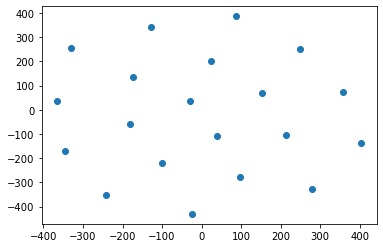

In [78]:
plt.scatter(
    embs[:,0], embs[:,1]
)

In [ ]:

plt.scatter([
    lemb[0]], [lemb[1]], color=colors[li], alpha=alphas[ep], s=ep*10, 
    label=lang_labels[li] if ep+1 == max_ep else None
)
